In [16]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rates import Kadonis

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-colorblind')

In [11]:
kadonis1 = Kadonis(version=1)  # == Kadonis(Path.cwd().parent / "Data/kadonis_rrates_1.0.txt")

In [12]:
kadonis03 = Kadonis(version=0.3)  # == Kadonis(Path.cwd().parent / "Data/kadonis_rrates_0.3.txt")

In [17]:
df = pd.read_csv("uncertainties.csv")

In [21]:
isos = ['AL 27-factor',
 'AR 38-factor',
 'AR 39-factor',
#  'AR 40-factor',
#  'AR 41-factor',
#  'AR 42-factor',
#  'CA 48-factor',
#  'CL 37-factor',
#  'CL 38-factor',
#  'CL 39-factor',
#  'MG 26-factor',
#  'MG 27-factor',
#  'NA 23-factor',
#  'NE 20-factor',
#  'NE 22-factor',
#  'P  31-factor',
#  'S  35-factor',
#  'S  36-factor',
#  'SI 28-factor',
#  'SI 30-factor',
#  'SI 31-factor',
 'SI 32-factor']

kd_theory = [ 'AR 38',
 'AR 39',]

AL 27
AL 27 nor in kd_theory


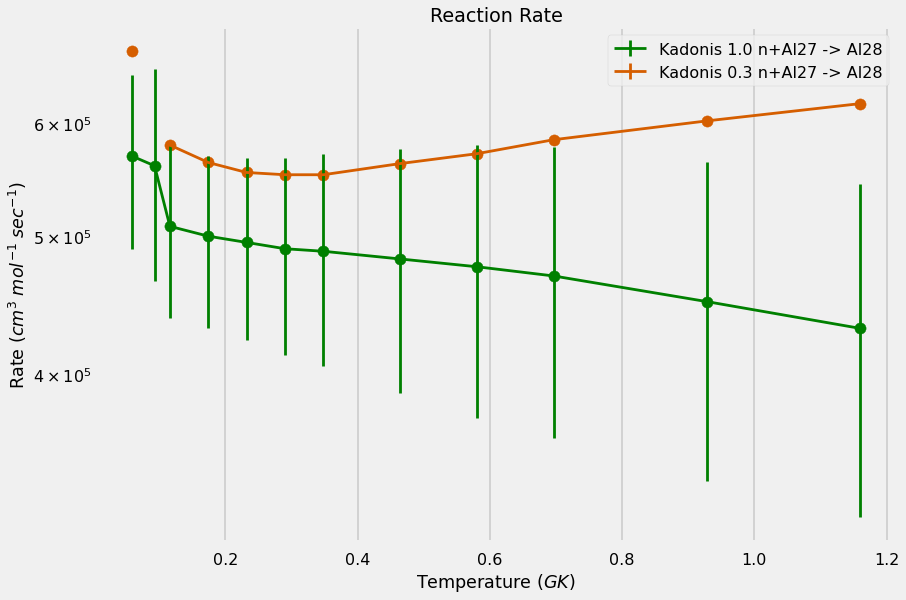

AR 38


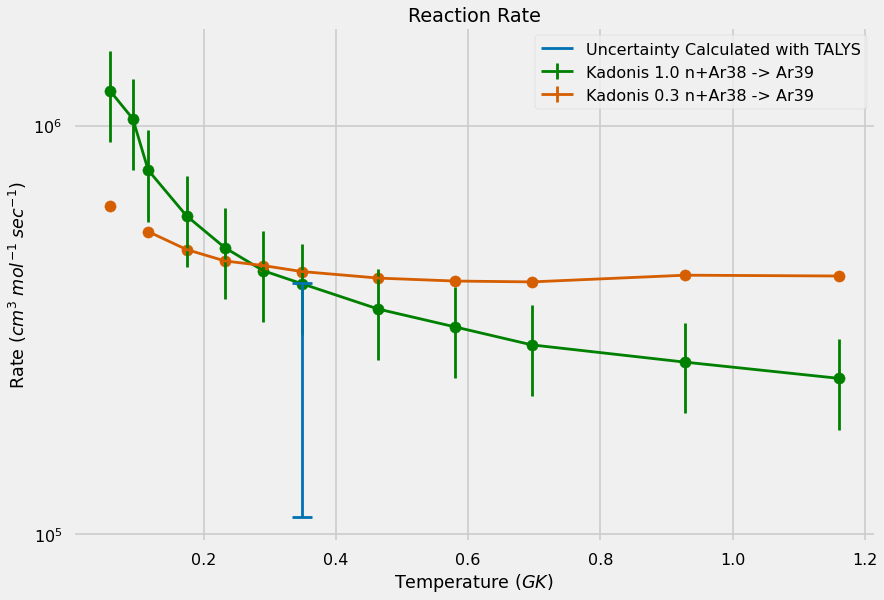

AR 39


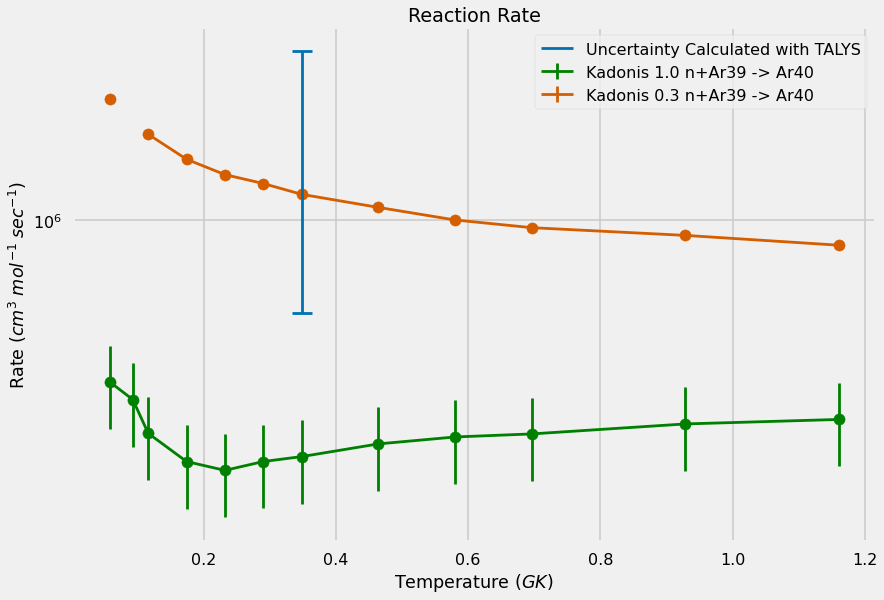

SI 32
SI 32 nor in kd_theory
???


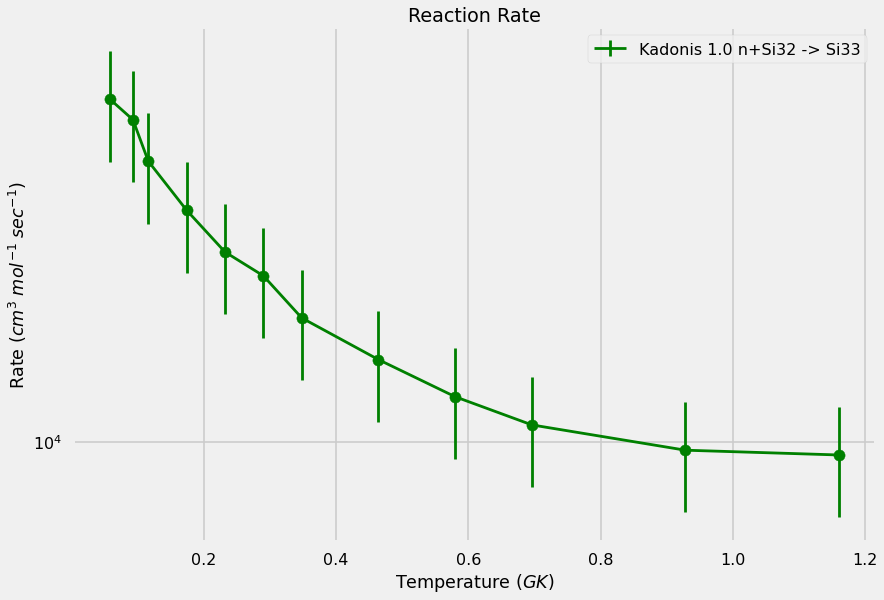

In [30]:
for iso in isos:
    iso = iso[0:5]
    print(iso)
    
    if iso not in kd_theory:
        print(f"{iso} nor in kd_theory")
        try:
            kadonis1[iso].mpl_plot()
            kadonis03[iso].mpl_plot()
        except:
            print("???")
            
    else:
        try:
            ax = kadonis1[iso].mpl_plot()
            ax = kadonis03[iso].mpl_plot(ax=ax)
            
            element = iso[0:2].capitalize().strip()
            mass = iso[2:].strip()
        
            iso = mass + element
        
            ax.plot([0.348, 0.348],
                [float(df[df.Isotope == iso].MaxRate), float(df[df.Isotope == iso].MinRate)],
                c = "C0",
                label="Uncertainty Calculated with TALYS",
                zorder=4)
        
            ax.scatter([0.348, 0.348],
                [float(df[df.Isotope == iso].MaxRate), float(df[df.Isotope == iso].MinRate)],
                marker="_",
                s=400,
                c = "C0",zorder=4)
            
        except:
            print("???")
            
    plt.legend()
    plt.show()
    

    #kadonis1[iso].diff(kadonis03[iso]).mpl_plot();
    #plt.show()

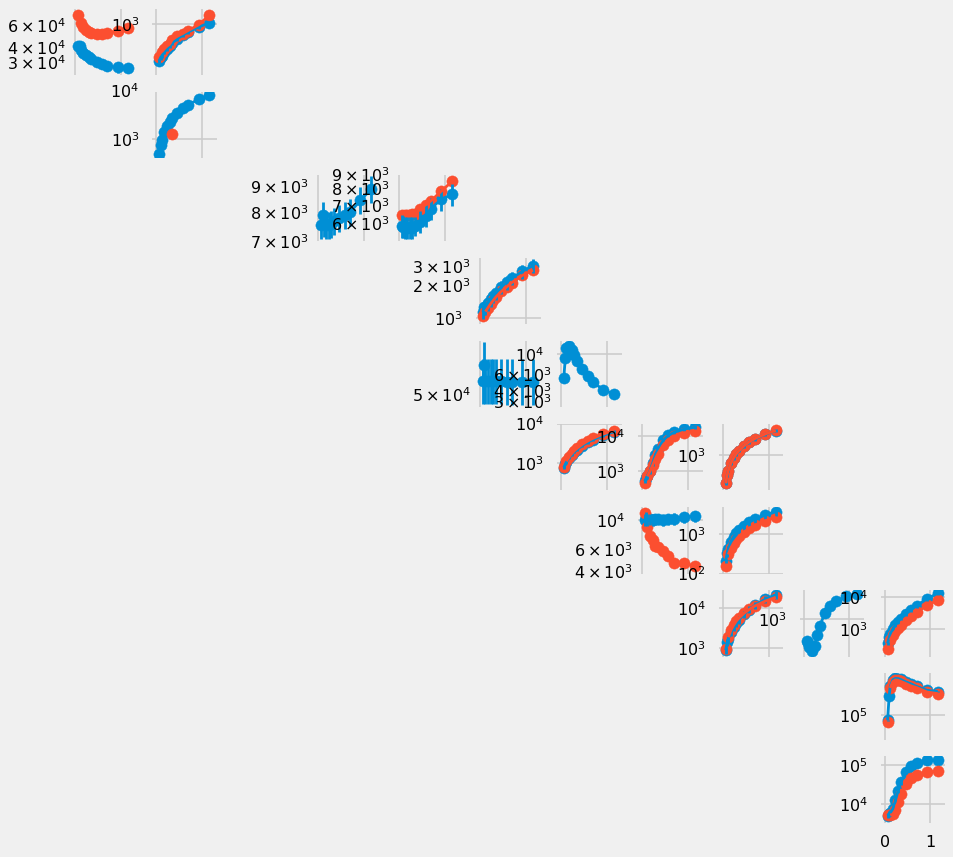

In [22]:
from rates import Isotope
def isotope_grid(x, y):


    x = Isotope.name(x).numbers()
    y = Isotope.name(y).numbers()
    x = (x[0], x[1]-x[0])
    y = (y[0], y[1]-y[0])

    x_axis = []

    for i in range(x[0], y[0]+1):
        x_axis.append([])
        for j in range(x[1], y[1]+1):
            x_axis[-1].append((i, j))

    return np.array(x_axis)

def mpl_plt_grid(isotopes_to_plot):
    
    iso_s = isotopes_to_plot.shape
    fig, axs= plt.subplots(iso_s[0],iso_s[1], sharex=True, figsize=(14, 14))

    for iso, ax in zip(isotopes_to_plot, axs):
        for i, a in zip(iso, ax):
            isotope = str(Isotope(i[0], i[1]+i[0]))
            if kadonis1.in_file(isotope):
                a = kadonis1[isotope].mpl_plot(a)
            if kadonis03.in_file(isotope):
                a = kadonis03[isotope].mpl_plot(a)
                
            if not (kadonis03.in_file(isotope) or kadonis1.in_file(isotope)):
                a.remove()
            else:
                a.set_title("")
                a.get_legend().remove()
                a.xaxis.label.set_visible(False)
                a.yaxis.label.set_visible(False)

mpl_plt_grid(isotope_grid("H1", "Ne20"))